# **Überschrift**

File Description

##**1. Dataset Description**

### TO-DO:

- In README eine Kapitel "Dataset" machen, wo ich Struktur, Anzahl Teilnehmer, Anzahl Sessions, Anzahl csv files, ob bereits preprocessing gemacht wurde etc. beschreiben. Hier auch!
- check ob classes imbalanced sind oder nicht!
- zeigen, ob jede condition immer ein label hat oder ob innerhalb einer condition das label sich ändert (glaube nicht, weil man ja nach jedem work block ein difficulty assessment gibt) -> Assumption der window function dass label innerhalb einer condition immer gleich ist, weshalb wir einfach immer das label des ersten Eintrags nehmen
- zeigen, dass jede Condition innerhalb einer Session sequentiell vorkommt und nicht am Anfang und am Ende nochmal -> wichtig weil wir groupby machen in der window function und wenn gewisse conditions mehrmals an unterschiedlichen Stellen vorkommen, windowen wir schlimmsten falls mit Daten die gar nicht chronologisch sind!
- describing, wie die Response values derived wurden (TLX Scores aus der Umfrage beschreiben, die Umfrage generell beschreiben und wie daraus dann die Response values derived wurde und warum man das gemacht hat). Hier ist Beschreibung von ChatGPT: \
"The NASA-TLX is a multi-dimensional rating scale used to assess perceived workload in performing a task. It asks participants to rate the task workload based on six subscales:\
Mental Demand: How much mental and perceptual effort was required?\
Physical Demand: How much physical effort was required?\
Temporal Demand: How much time pressure did you feel?\
Performance: How successful do you think you were in performing the task?\
Effort: How hard did you need to work to achieve your performance?\
Frustration Level: How insecure, discouraged, irritated, or stressed did you feel?\
Participants rate each of these on a scale of 0 to 100. These scores are then summed to obtain an overall workload score.\
The summed TLX scores are normalized to a range between 0 and 1 (a common practice to standardize subjective assessments).

### CODE:

In [1]:
import os
import pandas as pd

In [15]:
data = pd.read_csv("/content/drive/MyDrive/Data/at_home_dataset/State1-Cut-WithProcessing-2024-10-28/8-07_cut.csv")
data.head(-100)

,token,RecID,Condition,EEG-L5,EEG-L3,EEG-C3,EEG-Cz,EEG-C4,EEG-R5,EEG-R3,TS_UNIX,Response
0,nnVO9p,8-07,ECzzz1,5.310368e-14,5.310670e-14,4.429541e-14,2.378953e-14,1.640951e-14,1.871704e-14,1.181489e-14,2024-10-10 15:54:51.923000+02:00,0.290909
1,nnVO9p,8-07,ECzzz1,5.146192e+00,2.460225e+00,1.094204e-01,6.902223e-01,3.730030e+00,1.003812e+01,8.011500e+00,2024-10-10 15:54:51.926000+02:00,0.290909
2,nnVO9p,8-07,ECzzz1,7.806151e+00,3.922503e+00,4.634359e-01,1.163448e+00,5.508512e+00,1.464513e+01,1.166778e+01,2024-10-10 15:54:51.926000+02:00,0.290909
3,nnVO9p,8-07,ECzzz1,6.525951e+00,3.662953e+00,9.858399e-01,1.206001e+00,4.302822e+00,1.107160e+01,8.777119e+00,2024-10-10 15:54:51.926000+02:00,0.290909
4,nnVO9p,8-07,ECzzz1,1.522541e+00,1.509594e+00,1.250135e+00,6.756463e-01,4.826457e-01,5.782019e-01,3.740564e-01,2024-10-10 15:54:51.926000+02:00,0.290909
...,...,...,...,...,...,...,...,...,...,...,...,...
112424,nnVO9p,8-07,Workzzz3,2.420786e+00,1.274347e+00,1.044762e+00,2.496165e+00,4.640590e+00,6.917383e+00,6.563850e+00,2024-10-10 16:55:20.439000+02:00,0.409091
112425,nnVO9p,8-07,Workzzz3,5.314838e+00,9.225332e+00,1.395500e+01,1.509192e+01,1.211385e+01,2.209776e+00,6.016341e+00,2024-10-10 16:55:20.440000+02:00,0.409091
112426,nnVO9p,8-07,Workzzz3,6.285723e+00,1.395013e+01,2.278691e+01,2.395649e+01,1.777412e+01,-1.541856e+00,5.571439e+00,2024-10-10 16:55:20.440000+02:00,0.409091
112427,nnVO9p,8-07,Workzzz3,3.916730e+00,1.168156e+01,2.151558e+01,2.336861e+01,1.830484e+01,-1.987961e+00,5.689667e+00,2024-10-10 16:55:20.448000+02:00,0.409091


##**2. Utility Scripts for Data Preparation and Training**

> **This chapter introduces the foundational utility scripts used throughout the project. These scripts handle essential tasks such as data loading, preprocessing, and transformation. By establishing a robust and reusable framework, these utilities ensure consistency and modularity across the workflow. The primary focus is on loading the EEG dataset, applying transformations, and preparing the data for subsequent analysis and training.**



### 2.1. Dataset Class for EEG Data



> This section defines the custom EEGDataset class, which is responsible for loading and organizing the EEG data from CSV files. The class handles merging data, extracting features and labels, and providing metadata for each sample. This serves as the foundation for preparing the dataset for training and evaluation.



#### TO-DO:

- Transform response column into labels (maybe compare response with condition and find treshold for labels). Right now the labels don't make sense because the tensor is of datatype long so it will be mostly zeros
- torcheeg hat transforms module wo man transformationen machen kann wie data augmentation sachen: Gaussian Noise Injection (Add small random noise to EEG signals), Time Shifting (Shift the time-series data slightly forward or backward), Frequency Domain Transformations (Alter the power of specific frequency bands.)
- überlegen, ob ich das transponieren der features hier schon machen will oder eher bei den model trainings files selbst. Wenn ich es dort überall transponieren müsste, dann mach ichs hier schon und sollte das in der Beschreibung/ in den Kommentaren unten begründen!
- description, wie die labels derived wurden, schreiben. Hier ist es, wie Michael es in seinem Paper gemacht hat: "For the classification and additional analyses, the TLX reports were summed, and the scores were normalized
(range 0 to 1). As labels for the classifiers, the TLX scores were categorized as "low", "medium", and "high" cognitive load when they belonged to the 33-, 66- and 100- percentile of the load reports in an individual session." Hier ist ChatGPTs Erklärung: "Percentiles are used to dynamically determine class thresholds based on the distribution of workload scores within each session. Instead of applying fixed thresholds across all data (e.g., 0.3 for "low," 0.6 for "medium"), percentiles adapt to the range of scores observed in each session. For example, the 33rd percentile marks the threshold below which scores are considered "low," and the 66th percentile separates "medium" from "high." This approach ensures that the labels reflect relative differences in workload for each session, accommodating variations in participant responses or task difficulty." Es geht also darum dass man alle Scores innerhalb einer Session, also je einen Score pro Work Task nimmt, sich die Range anschaut und darauf die Percentile Thresholds berechnet. Diese Erklärung sollte aber vielleicht eher in die utility function für die percentile berechnung gehen, damit hier nicht zu viel steht.

#### CODE:

In [6]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset

class EEGDataset(Dataset):
    def __init__(self, data_dir, window_size, overlap, percentiles = [33, 66], transform=None):
        """
        EEGDataset is a custom PyTorch Dataset for loading EEG data from CSV files.

        This class:
        - Reads and merges all CSV files in a specified directory into a unified dataset.
        - Extracts EEG electrode values as features and corresponding labels from each sample.
        - Optionally applies transformations to the features during data retrieval.
        - Provides metadata such as token, recording ID, and condition for each sample.

        Attributes:
            data (list): A list of dictionaries where each dictionary represents a sample with its features, label, and metadata.
            transform (callable, optional): A function or transformation to apply to the features during data retrieval.

        Args:
            data_dir (str): Path to the directory containing CSV files.
            overlap (float): Proportion of overlap between windows (0 to 1).
            condition_column (str): Column indicating task condition (e.g., 'Condition').
            percentiles (list): List of percentile thresholds. Default is [33, 66].
            transform (callable, optional): Transformations to apply to each sample.
        """
        self.data = []  # List to store all samples
        self.transform = transform

        # Load all CSV files and merge them into one dataset
        for file_name in os.listdir(data_dir):
            if file_name.endswith(".csv"):
                file_path = os.path.join(data_dir, file_name)
                csv_data = pd.read_csv(file_path)

                # Calculate label mapping for this session to transform the normalized labels into class labels
                unique_tlx_scores = csv_data['Response'].unique()
                label_mapping = calculate_workload_labels(unique_tlx_scores, percentiles)

                # Apply windowing and append each sample with its participant/session metadata
                windowed_samples = window_data(csv_data, window_size, overlap, label_mapping)
                self.data.extend(windowed_samples)

    def __len__(self):
        # Total number of samples in the dataset
        return len(self.data)

    def __getitem__(self, idx):
        # Retrieve a single sample
        sample = self.data[idx]

        # Extract features, label, and metadata
        features = torch.tensor(sample['features'].T, dtype=torch.float32)  # EEG window. float32 is less precise in it's decimals than float64 but more computationally efficient
        """
        PyTorch Dimension explanation:
          PyTorchs dimension interpretation can be described as [height, width] with height relating to rows and width relating to columns.
          Raw Data in CSV table has dimension [timesteps, electrodes] because the rows are the timesteps, thus width and vice versa.
          Shape after transposing: [num_electrodes, timesteps] which means that electrodes are the height, thus the rows.
          This is how 2D convolutional layers typically take input, since it's also how EEG diagrams look like i.e., the electrodes are the spatial dimension.
        """
        label = torch.tensor(sample['label'], dtype=torch.long)          # Label. long is used for large integer numbers
        token = sample['token']                                          # Subject ID
        rec_id = sample['RecID']                                         # Session ID
        condition = sample['Condition']                                  # Task Condition

        # Apply optional transformations
        if self.transform:
            features = self.transform(features)

        # Return the features, label, and metadata
        return features, label, sample['token'], sample['RecID'], sample['Condition']

In [43]:
dataset = EEGDataset("/content/drive/MyDrive/Data/at_home_dataset/State1-Cut-WithProcessing-2024-10-28", 3, 0.5)

In [18]:
dataset[-100]

(tensor([[-0.8566, -0.8979, -0.1556,  ...,  5.7159,  5.8034,  4.9406],
         [ 0.7678,  0.0657, -0.2148,  ..., -0.2892, -0.3598, -0.8545],
         [ 1.1079, -0.0896, -0.7866,  ..., -7.6479, -7.7351, -7.5975],
         ...,
         [-4.4166, -3.9162, -1.3451,  ..., -5.6999, -4.5408, -3.8591],
         [-0.7864, -2.2114, -2.8013,  ...,  8.1407,  6.0901,  3.7345],
         [-2.8353, -3.2751, -2.2323,  ...,  2.4564,  1.8763,  0.7862]]),
 tensor(2),
 'nnVO9p',
 '8-03',
 'MathxMedium')

### 2.2. Data Splitting Functions for Subject and Session Independent Training and Evaluation



> This section describes the splitting functions used to create subject-independent and session-independent data splits for training and testing. These include traditional holdout splits and Leave-One-Subject-Out Cross-Validation (LOSO-CV), enabling flexible evaluation of model generalization across participants and sessions.



To-Do:
- motivieren, warum LOSO und nicht leave n subjects out
- motivieren, warum subject-independent CV statt holdout splits
- generell test cases motivieren. Idee: Case 1 ist train und test auf einem subject aber session-independent split, Case 2 ist train und test auf allen subjects aber session-independent split, Case 3 ist subject-independent split für train und test -> Schwierigkeitsgrad steigt -> klar begründen warum ich das so mache und was die Insights sind, ggf. auch in Literatur suchen, wie die es machen
- überlegen, ob ich bei session-independent time order berücksichtigen muss oder nicht. Paper "A Dual-Adversarial Model for Cross-Time and Cross-Subject Cognitive Workload Decoding" hat für session-independent einfach session 1 als training und session 2 als test genommen mit der Begründung, dass man nicht die "Vergangenheit" mit der "Zukunft" vorhersagen kann. Das würde mit meinem Argument, dass jede Session ein "eigenes" Event ist, weil wir unterschiedliche Stimmung, unterschiedliche Alertness, unterschiedliche Electrode Position etc haben. Ich muss klar begründen und entscheiden wie ich es mache, weil wenn ich die Theorie des Papers nehme, dann kann ich keine CV machen aber wenn ich meine Theorie nehme, dann könnte ich CV machen. Außerdem muss ich klar begründen, ob es Sinn macht, auf alle Subejcts zu trainieren und testen für session-independence oder ob ich es für jedes Subjects einzeln machen sollte und dann den Average nehme
- nachdem ich vorherige 2 Punkte geklärt habe, session-independent split Funktionen coden

In [45]:
from torch.utils.data import Subset, DataLoader, random_split

def leave_one_subject_out_cv(dataset, batch_size, train_shuffle=True, val_split=0.2):
    """
    Create subject-independent Leave-One-Subject-Out Cross-Validation splits with validation set.
    Args:
        dataset (Dataset): The full PyTorch Dataset containing all samples.
        batch_size (int): Batch size for DataLoader.
        train_shuffle (bool): Whether to shuffle the training DataLoader.
        val_split (float): Proportion of the training data to use for validation.
    Yields:
        train_loader, val_loader, test_loader, test_subject: DataLoaders for each fold and the test subject.
    """
    # Collect unique participants
    participants = sorted(set(sample['token'] for sample in dataset.data)) # sorting participants for reproducability reasons

    for test_subject in participants:
        test_indices = [
            i for i, sample in enumerate(dataset.data)
            if sample['token'] == test_subject
        ]
        train_indices = [
            i for i, sample in enumerate(dataset.data)
            if sample['token'] != test_subject
        ]

        # Create train and test subsets by omitting meta data and only including features and label
        train_subset = [(dataset[idx][0], dataset[idx][1]) for idx in train_indices] # features is in tuple position 0 and label is in tuple position 1. Output: (features, label)
        test_subset = [(dataset[idx][0], dataset[idx][1]) for idx in test_indices]

        # Split training subset into training and validation sets
        train_len = int((1 - val_split) * len(train_subset))
        val_len = len(train_subset) - train_len
        train_subset, val_subset = random_split(train_subset, [train_len, val_len])

        # Create DataLoaders
        train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=train_shuffle)
        val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

        yield train_loader, val_loader, test_loader, test_subject


### 2.3. Windowing Function

Each window is a 2D array with dimensions [window_size, num_electrodes]. Example: \
window = [ \
  [eeg_1_t1, eeg_2_t1, ..., eeg_7_t1],  # Time step 1: Values for 7 electrodes \
  [eeg_1_t2, eeg_2_t2, ..., eeg_7_t2],  # Time step 2 \
  ..., \
  [eeg_1_tN, eeg_2_tN, ..., eeg_7_tN]   # Time step N \
]

To-Do:
- Figure out sample rate, because it determines how many data points correspond to a given window length in seconds. For a 2-second window at 128 Hz, the window will have 128 * 2 = 256 data points.
- begründe ganz klar warum du welche window länge gewählt hast. Shorter windows capture finer temporal details but may lose context. Longer windows capture more context but may dilute temporal details.
- begründe ganz klar warum du welche overlap gewählt hast (oft 50% normal)
- überleg dir ob du sliding window machst und begründe warum. Klär dabei, ob du nur innerhalb task schwierigkeiten und/oder labels windowst oder nicht
- wenn sampling rate zu hoch ist, überleg dir downzusamplen um data size und computational cost zu reduzieren. Das solltest du wahrscheinlich aber im Dataset class machen. Außerdem klären, ob Michael das nicht schon gemacht hat, angesichts dessen, dass er meinte, dass Daten preprocessed sind
- apply das windowing in dataset class unter getitem
- zeig, dass die window function eben nur windowing betreibt innerhalb von subejcts, sessions und conditions und es keine überschneidungen gibt und guck auch mal, ob alle Fenster gleich groß sind, nicht dass das das letzte Fenster zum Beispiel zu klein ist, weil es nicht genügend Daten hatte und deswegen beim Training dann ein Error geworfen wird deswegen

In [2]:
def window_data(data, window_size, overlap, label_mapping, condition_column="Condition", sampling_rate=250):
    """
    Segments EEG data into overlapping windows within each condition and preserves metadata.

    Args:
        data (pd.DataFrame): Input EEG data containing signal and metadata.
        window_size (float): Window length in seconds.
        overlap (float): Proportion of overlap between windows (0 to 1).
        label_mapping (dict): Mapping of workload TLX scores to class labels.
        condition_column (str): Column indicating task condition (e.g., 'Condition').
        sampling_rate (int): Sampling rate of the EEG data (default is 250 Hz).

    Returns:
        windowed_data (list): List of dictionaries containing 'window' and metadata.
    """
    # Convert window size and step size to samples
    samples_per_window = int(window_size * sampling_rate)
    step_size = int(samples_per_window * (1 - overlap))

    windowed_data = []  # List to store windows and metadata

    # Group the data by task condition
    for condition, group in data.groupby(condition_column): # condition contains the unique value of the column the DataFrame is grouped by and group contains a DataFrame with all rows belonging to that group
        signal = group.iloc[:, 3:-2].values  # Extract only electrode signal columns (3rd column to second-to-last column)
        normalized_tlx_score = group['Response'].iloc[0]   # Use the first 'Response' value as the label for the group
        label = label_mapping[normalized_tlx_score]  # Map score to class label

        # Extract metadata shared across this group
        token = group['token'].iloc[0] # unique subject ID
        rec_id = group['RecID'].iloc[0] # unique session ID

        # Create overlapping windows
        for start_idx in range(0, len(signal) - samples_per_window + 1, step_size):
            end_idx = start_idx + samples_per_window
            window = signal[start_idx:end_idx]  # Extract window [time steps, electrodes]

            # Append the window with metadata
            windowed_data.append({
                "features": window,
                "label": label,
                "token": token,
                "RecID": rec_id,
                "Condition": condition
            })

    return windowed_data


### 2.4. Script for Calculating Workload Labels

In [1]:
import numpy as np

def calculate_workload_labels(unique_scores, percentiles=[33, 66]):
    """
    Assigns workload class labels (low, medium, high) based on percentile thresholds.

    Args:
        unique_scores (list or np.array): Array of unique TLX scores (normalized workload scores).
        percentiles (list): List of percentile thresholds. Default is [33, 66].

    Returns:
        dict: Mapping of unique scores to class labels (0: low, 1: medium, 2: high).
    """
    # Calculate percentile thresholds
    thresholds = np.percentile(unique_scores, percentiles)

    # Initialize label mapping
    label_mapping = {}

    # Dynamically assign class labels based on thresholds
    for score in unique_scores:
        assigned_label = 0  # Default to lowest class
        for i, threshold in enumerate(thresholds):
            if score > threshold:
                assigned_label = i + 1  # Increment label for each threshold crossed
            else:
                break # Stop checking if the score doesn't cross the threshold
        label_mapping[score] = assigned_label

    return label_mapping

In [12]:
print(np.percentile([0.218, 0.44, 0.78, 0.01], [33, 66]))

[0.21592 0.43556]


In [14]:
print(calculate_workload_labels([0.218, 0.44, 0.78, 0.01]))

{0.218: 1, 0.44: 2, 0.78: 2, 0.01: 0}


### 2.5. Custom Classifier Trainer

In [57]:
from torcheeg.trainers import ClassifierTrainer
import torch

class CustomClassifierTrainer(ClassifierTrainer):
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)  # Forward pass - model logits
        preds = torch.argmax(y_hat, dim=1)  # Convert logits to predicted class indices
        loss = self.ce_fn(y_hat, y)  # Cross-entropy loss

        # Log training metrics
        self.log("train_loss", loss, prog_bar=True)
        self.train_metrics.update(preds, y)  # Update metrics
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        preds = torch.argmax(y_hat, dim=1)  # Convert logits to predicted class indices
        loss = self.ce_fn(y_hat, y)

        # Log validation metrics
        self.log("val_loss", loss, prog_bar=True)
        self.val_metrics.update(preds, y)  # Update metrics
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        preds = torch.argmax(y_hat, dim=1)  # Convert logits to predicted class indices
        loss = self.ce_fn(y_hat, y)

        # Log test metrics
        self.log("test_loss", loss, prog_bar=True)
        self.test_metrics.update(preds, y)  # Update metrics
        return loss


### 2.X. Preprocessing Functions for Raw EEG Data

To-Dos:
- Michael meinte, dass Daten preprocessed sind. Jedoch frage ich mich, ob trotzdem irgendein Preprocessing gemacht werden muss z.B. Normalisierungen und wenn, tut man das auf den gesamten Datensatz oder nur im Batch oder nur im Window? Was ist mit Band-pass Filtering und Bad Channel Detection? Downsampling?
- Im Repo von EEGNet in examples/ERP.py haben sie (laut ChatGPT) folgendes gemacht: "Rescaling: Multiplying raw EEG values by 1000 to adjust for deep learning sensitivity"
- nutz die transform funktionen von torcheeg, du kannst sie sogar als pipeline definieren und dann deiner pytorch dataset klasse übergeben!

## **3. Deep Learning Model Scripts for EEG Classification**



> **This chapter contains scripts for the implementation of various deep learning models used for EEG-based mental workload classification. Each model is designed to process EEG data and extract meaningful features for classification tasks.**



To-Dos:
- Each model will do the dimension reshaping in it's forward function for example:

**Fully Connected (Dense) Models** \
Input Format: [batch_size, num_features] \
Each sample is a flat vector of features.
For your 7 electrodes, this means the input tensor for a batch of size 32 would look like: \
Shape: [32, 7] \
Example: tensor([
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    ...
])

**Convolutional Neural Networks (CNNs)** \
Input Format: [batch_size, num_channels, num_samples] \
CNNs often treat EEG data as 1D temporal signals or 2D spatial signals.
For 7 electrodes, this means the input tensor might look like: \
Shape: [32, 1, 7] \
Example: tensor([[[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]], ...]) \
num_channels is usually 1 for single-channel data (e.g., one "signal" per electrode).

**Recurrent Neural Networks (RNNs) or Transformers** \
Input Format: [batch_size, sequence_length, num_features] \
If you are using a time window (e.g., 2 seconds of data sampled at 128 Hz), the input would contain multiple timesteps. \
For 7 electrodes over a sequence of 256 timesteps (2 seconds at 128 Hz), the input tensor for a batch of size 32 would look like: \
Shape: [32, 256, 7] \
Example: tensor([
    [[0.1, 0.2, 0.3, ..., 0.7],  # Timestep 1
     [0.2, 0.3, 0.4, ..., 0.8],  # Timestep 2
     ...                         # Timestep 256
    ],
    ...
])

- understand how input needs to look like for each model, especially when it comes to windowing! ChatGPT says that EEGNet, TSception and EEGConformer need the data to be windowed (2-D), otherwise they can't learn temporal patterns if they only get one timestamp. EEGConformer needs that too because it starts with a CNN. Here is what CHatGPT says:

**Before Windowing:** \
Your original data (continuous time-series) looks like this: \
Shape: [num_timestamps, num_channels] \
Example: If you have 1000 timestamps and 7 electrodes: \
[[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],  # Timestamp 1 \
 [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],  # Timestamp 2 \
 ... \
]  # Shape: [1000, 7] \

**After Windowing:** \
The data is sliced into windows of fixed length (e.g., 2 seconds at 128 Hz = 256 samples per window). \
Each window is a 2D matrix: \
Rows = Number of channels (e.g., 7 electrodes). \
Columns = Number of samples in the window (e.g., 256 samples). \
If you have overlapping windows, the number of windows will increase based on the overlap size. \
Example: \
For a 2-second window, 7 channels, and 256 samples per window: \
Window 1: [[0.1, 0.2, 0.3, ..., 0.256],  # Electrode 1 \
           [0.2, 0.3, 0.4, ..., 0.257],  # Electrode 2 \
           ... \
           [0.7, 0.8, 0.9, ..., 0.962]]  # Electrode 7 \
Window 2: [[0.3, 0.4, 0.5, ..., 0.310],  # Electrode 1 \
           ... \
           [0.8, 0.9, 1.0, ..., 0.990]]  # Electrode 7 \
Shape of one window: [num_channels, num_samples_in_window] = [7, 256]. \
Shape of the full dataset after windowing: [num_windows, num_channels,  num_samples_in_window]. \

- Paper "LGNet: Learning local–global EEG representations for cognitive workload classification in simulated flights" hat zwar overlapping windows benutzt, aber NICHT zwischen training und test set, sodass im test set keine Information ist, die auch im training set drinnen sein könnte

### 3.1. EEGNet



> **Architecture Description:** EEGNet is a compact convolutional neural network (CNN) designed for EEG-based BCI tasks. It begins with a temporal convolution, where kernels span multiple samples along the temporal dimension but have a size of 1 along the channel dimension. This extracts temporal patterns independently for each channel. A depthwise convolution follows, operating across electrode channels with a kernel that spans all channels but is fixed at 1 along the temporal dimension. This learns spatial relationships between brain regions for each temporal feature, reducing parameters by isolating spatial patterns. Finally, a separable convolution refines the features in two steps. First, a depthwise convolution processes the temporal dimension, in contrast to the earlier depthwise convolution that operated across channels. This captures finer temporal patterns within each feature map. Then, a pointwise convolution (1x1 kernel) combines feature maps, learning global relationships across spatial and temporal patterns. This modular design minimizes parameters while preserving interpretability and generalization across BCI paradigms. \
**Input Description:** The original EEGNet implementation was developed in Keras, but for consistency with PyTorch as the chosen framework, the TorchEEG implementation will be used here. The raw EEG data must be segmented into fixed-length time windows and formatted as a 3D tensor with dimensions (batch_size, 1, num_electrodes, chunk_size), where num_electrodes represents the number of EEG channels, and chunk_size corresponds to the number of time points in each window, while 1 is a dummy channel dimension needed for the Conv2d layer (Conv2d format: [batch_size, channels, height, width]) with height and width being the dimensions of the image input which for our data is defined by number of electrodes and number of timesetps in each window while the channels parameter here does not relate to EEG channels but to the depth of the data for example used in RGB image data where it would be 3 for the three color channels).

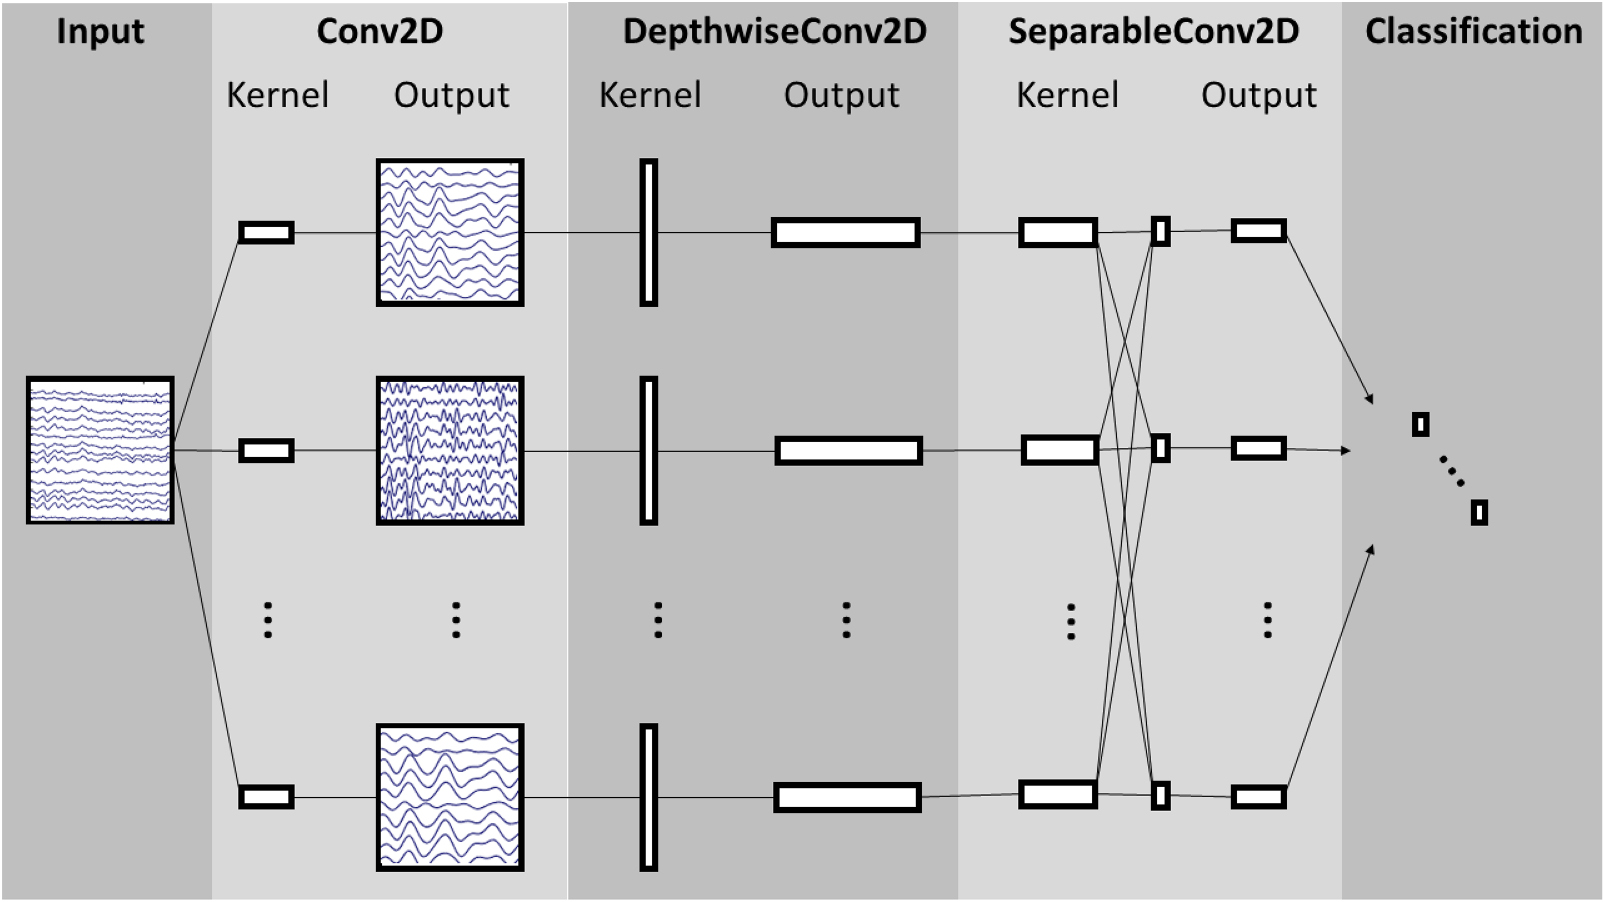

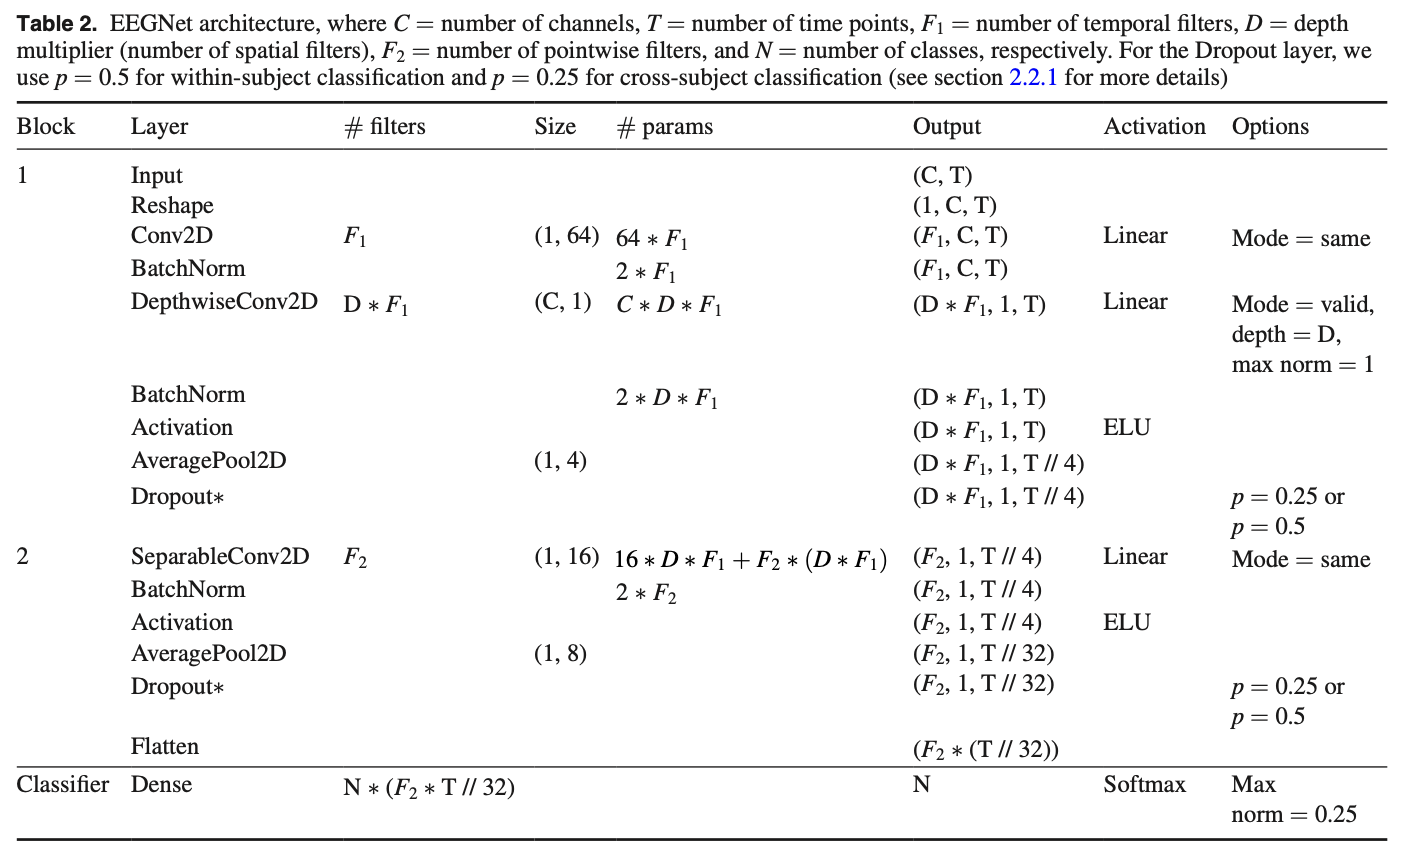

To-Do's:
- ChatGPT meinte, dass im Original-Repo von EEGNet unter examples/ERP.py sie folgendes mit den Labels gemacht haben: "One-Hot Encoding Labels:
Labels are converted to one-hot encoded format for classification.
For example, if you have 3 classes, a label of 1 becomes [1, 0, 0].
Your Data: If your labels are integers representing workload levels or task types, convert them to one-hot encoding using a library like tensorflow.keras.utils.to_categorical." -> klären, ob ich label Daten transformieren muss oder nicht!
-

In [20]:
# Install TorchEEG
!pip install torcheeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.5/214.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.2/115.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from torcheeg.models import EEGNet  # Import EEGNet from TorchEEG

# Define EEGNet model
model = EEGNet(
    chunk_size=128,        # Number of time points in each window (samples per chunk)
    num_electrodes=7,      # Number of electrodes (channels)
    dropout=0.5,           # Dropout rate
    kernel_1=64,           # Kernel size for temporal convolution in Block 1
    kernel_2=16,           # Kernel size for temporal convolution in Block 2
    F1=8,                  # Number of temporal filters in Block 1
    F2=16,                 # Number of pointwise filters in Block 2
    D=2,                   # Depth multiplier (number of spatial filters)
    num_classes=2          # Number of output classes
)

# Print model architecture for verification
print(model)

EEGNet(
  (block1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(1, 64), stride=(1, 1), padding=(0, 32), bias=False)
    (1): BatchNorm2d(8, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (2): Conv2dWithConstraint(8, 16, kernel_size=(7, 1), stride=(1, 1), groups=8, bias=False)
    (3): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (4): ELU(alpha=1.0)
    (5): AvgPool2d(kernel_size=(1, 4), stride=4, padding=0)
    (6): Dropout(p=0.5, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(1, 16), stride=(1, 1), padding=(0, 8), groups=16, bias=False)
    (1): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (3): ELU(alpha=1.0)
    (4): AvgPool2d(kernel_size=(1, 8), stride=8, padding=0)
    (5): Dropout(p=0.5, inplace=False)
  )
  (lin): Linear(in_features=64, out_features=2, bias=False)
)


In [ ]:
# Example EEGNet initialization
model = EEGNet(
    chunk_size=151,          # Number of time points (T)
    num_electrodes=7,        # Number of channels (C)
    F1=8, F2=16, D=2,        # Model-specific parameters
    num_classes=2,           # Number of classes for classification
    dropout=0.5              # Dropout rate
)

# Simulated batch of EEG data
batch_size = 32
num_electrodes = 7
chunk_size = 151
dummy_input = torch.randn(batch_size, 1, num_electrodes, chunk_size)  # Shape [32, 1, 7, 151]

# Pass data through the model
output = model(dummy_input)  # Shape [32, num_classes]

# Output details
print("Input shape:", dummy_input.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([32, 1, 7, 151])
Output shape: torch.Size([32, 2])


## **4. Experiments**

To-Do:
- implement early-stopping parameter
- implement adaptive learning rates
- implement improved logging such as Tensorboard or WEights & Biases
- rework the script so it's generic and can be used for other training methods such as domain adaptation training and stuff like that (see torcheeg trainer module for that)
- if classes are imbalanced, you can do over/undersampling or adjust class weights. For oversampling and undersampling you need to implement that manually or use pytorch's WeightedRandomSampler. Torcheeg allows you to assign class weights directly in the loss function: trainer = ClassifierTrainer(
    model=model,
    num_classes=2,
    lr=1e-4,
    weight_decay=1e-4,
    class_weights={0: 1.5, 1: 1.0}  # Assign higher weight to minority class
)
- adaptive batch sizes: Small batch sizes work better for noisy EEG data, but larger batches can stabilize gradient updates. You may want to adapt the batch size as training progresses. TorchEEG doesn't directly support adaptive batch sizes in its trainers, but you can extend the training loop to modify the DataLoader's batch size dynamically. For example: if epoch > 10:
    train_loader = DataLoader(dataset, batch_size=64, shuffle=True)
- gradient clipping to prevent exploding gradients during training, especially in deep networks. TorchEEG supports gradient clipping via PyTorch Lightning’s Trainer class: trainer = ClassifierTrainer(
    model=model,
    num_classes=2,
    lr=1e-4,
    weight_decay=1e-4,
    gradient_clip_val=1.0  # Clip gradients to a max norm of 1.0
)
- mixed precision training (combining float32 and float16) can speed up training and reduce memory usage on GPUs. TorchEEG supports mixed precision via the precision parameter: trainer = ClassifierTrainer(
    model=model,
    num_classes=2,
    lr=1e-4,
    weight_decay=1e-4,
    accelerator="gpu",
    precision=16  # Use float16 for faster training
)
- torcheeg allows you to define your own custom loss functions which you might need for example for multilabel classification but make sure to see if the trainer module already has the ones you need!
- torcheegs FinetuneTrainer allows you to finetune on pretrained models
- torcheeg has its own trainers for domain adaptaion such as DANN trainers so utilize those and check when and how to do so!

### 4.1. EEGNet

In [64]:
from torcheeg.models import EEGNet
from torcheeg.trainers import ClassifierTrainer
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.transforms import Compose

# Define the transform inline
transform = Compose([
    lambda x: x.unsqueeze(0)  # Add the channel dimension: (num_electrodes, chunk_size) -> (1, num_electrodes, chunk_size)
    # Add more preprocessing steps here if needed, e.g. scaling, normalization, etc.
])

# Initialize the dataset
#dataset = EEGDataset("/content/drive/MyDrive/Data/at_home_dataset/State1-Cut-WithProcessing-2024-10-28", 3, 0.5, transform = transform)

# Dynamically get chunk_size and num_electrodes from the dataset
first_sample = dataset[0][0][0]  # Access first sample's features
num_electrodes, chunk_size = first_sample.shape  # Shape: [num_electrodes, chunk_size]

print(f"Detected input shape: {num_electrodes} electrodes, {chunk_size} time points per window.")

# Initialize the model
model = EEGNet(num_electrodes=num_electrodes, chunk_size=chunk_size, num_classes=3)

# Training parameters
learning_rate = 1e-3
batch_size = 32
epochs = 30

# Iterate through LOSO-CV folds
for train_loader, val_loader, test_loader, test_subject in leave_one_subject_out_cv(dataset, batch_size):
    print(f"Training fold with test subject {test_subject}")

    # Get a single batch from the DataLoader to check if input shape is correct
    batch, labels = next(iter(train_loader))
    print(f"Input batch shape: {batch.shape}, Labels shape: {labels.shape}") # expected: [batch_size, 1, num_electrodes, chunk_size]
    print("Unique Labels: ", torch.unique(labels))

    # Pass the batch through the model to check if output shape is correct
    output = model(batch)
    print(f"Output shape: {output.shape}") # expected: [batch_size, num_classes] (labels have to be one-hot-encoded)

    # Define the trainer. We're using the custom classifier trainer we have defined in utils since the basic classifier trainer by torcheeg outputs logits while our labels are integers
    trainer = CustomClassifierTrainer(
        model=model,
        num_classes=3,
        lr=learning_rate,
        weight_decay=1e-4,  # You can adjust this
        accelerator="gpu" if torch.cuda.is_available() else "cpu",  # Automatically use GPU if available
        devices=1  # Single device
    )

    # Train the model
    trainer.fit(
        train_loader=train_loader,
        val_loader=val_loader,
        max_epochs=epochs,
        enable_progress_bar=True
    )

    # Evaluate on the test set
    test_metrics = trainer.test(
        test_loader=test_loader,
        enable_progress_bar=True
    )

    print(f"Test metrics for subject {test_subject}: {test_metrics}")

Detected input shape: 7 electrodes, 750 time points per window.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | model         | EEGNet           | 2.3 K  | train
1 | ce_fn         | CrossEntropyLoss | 0      | train
2 | train_loss    | MeanMetric       | 0      | train
3 | val_loss      | MeanMetric       | 0      | train
4 | test_loss     | MeanMetric       | 0      | train
5 | train_metrics | MetricCollection | 0      | train
6 | val_metrics   | MetricCollection | 0      | train
7 | test_metrics  | MetricCollection | 0      | train
-----------------------------------------------------------
2.3 K     Trainable params
0         Non-trainable params
2.3 K     Total params
0.009     Total estimated

Training fold with test subject 1IVGii
Input batch shape: torch.Size([32, 1, 7, 750]), Labels shape: torch.Size([32])
Unique Labels:  tensor([0, 1, 2])
Output shape: torch.Size([32, 3])


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[2024-12-17 16:19:19] INFO (torcheeg/MainThread) 
[Val] val_loss: nan val_accuracy: 0.250 

INFO:torcheeg:
[Val] val_loss: nan val_accuracy: 0.250 



Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:
Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

## **5. Results**

To-Do:
- EEGNet hat einen Description Teil wie man Ergebnisse interpretieren kann -> interpretability und insights wichtig zu klären! Schau in den anderen Papern auch nach!